# PCA

# IRIS Data 4D to 1D

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings

In [53]:
warnings.filterwarnings('ignore')

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigen_Vectors:- 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen_Values:- 
[2.93808505 0.9201649  0.14774182 0.02085386]
0.7296244541329991
0.22850761786701712
0.03668921889282868
0.00517870910715499


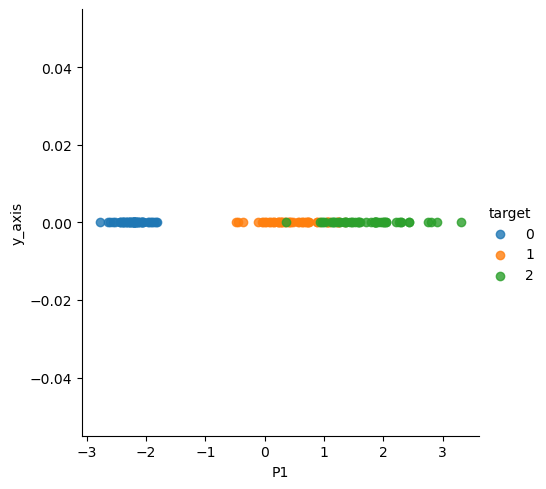

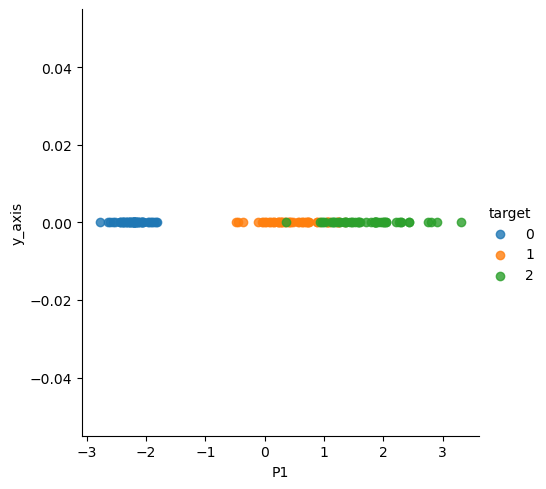

(150, 4)
(150, 1)
Accuracy Score Train data is:-  0.9166666666666666
Accuracy Score Test data is:-  0.8666666666666667


In [54]:
df=pd.read_csv('G:/dataset/classification/iris.csv')
df.drop('Unnamed: 0',axis='columns',inplace=True)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc=StandardScaler()
X_scaled=sc.fit_transform(x)
rows=X_scaled.T
con_matrix=np.cov(rows)
print(con_matrix)
eig_value,eig_vector=np.linalg.eig(con_matrix)
print('Eigen_Vectors:- \n%s'%eig_vector)
print('Eigen_Values:- \n%s'%eig_value)
for i in range(len(eig_value)):
    print(eig_value[i]/sum(eig_value))
projected=X_scaled.dot(eig_vector.T[0])
df1=pd.DataFrame(projected,columns=['P1'])
df1['y_axis']=0.0
df1['target']=y
sns.lmplot(data=df1,x='P1',y='y_axis',fit_reg=False, hue='target')
plt.show()
pca=PCA(n_components=1) #reduce dim to 1
projected_x=pca.fit_transform(X_scaled)
df1=pd.DataFrame(projected_x,columns=['P1'])
df1['y_axis']=0.0
df1['target']=y
sns.lmplot(data=df1,x='P1',y='y_axis',fit_reg=False, hue='target')
plt.show()
print(X_scaled.shape)
print(projected_x.shape)
df3=projected_x.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(df3,y,test_size=0.2)
model=SVC()
model.fit(X_train,y_train)
print('Accuracy Score Train data is:- ',model.score(X_train,y_train))
print('Accuracy Score Test data is:- ',model.score(X_test,y_test))

In [55]:
inputs=np.array([[6.6,3.0,4.4,1.4]])
scale=sc.transform(inputs)
pca_input=pca.transform(scale)
model.predict(pca_input)

array([1], dtype=int64)

# IRIS Data 4D to 2D

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigen_Vectors:- 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen_Values:- 
[2.93808505 0.9201649  0.14774182 0.02085386]
0.7296244541329991
0.22850761786701712
0.03668921889282868
0.00517870910715499


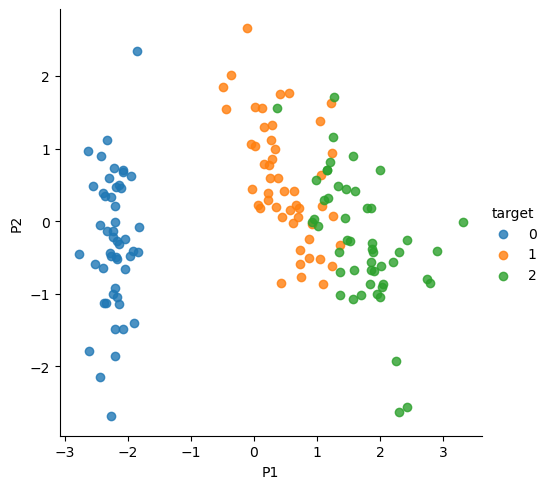

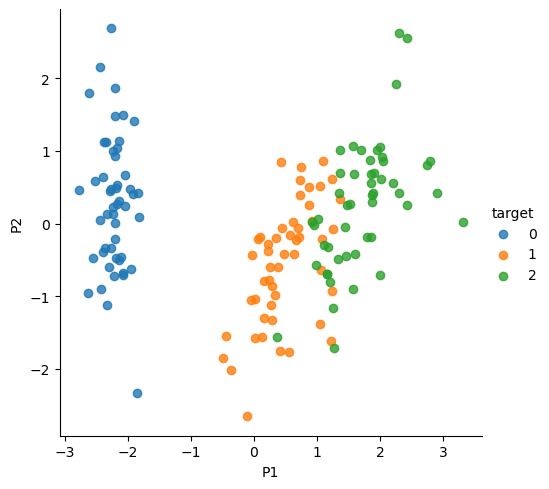

Accuracy Score Train data is:-  0.9
Accuracy Score Test data is:-  0.9666666666666667


In [57]:
df=pd.read_csv('G:/dataset/classification/iris.csv')
df.drop('Unnamed: 0',axis='columns',inplace=True)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc=StandardScaler()
X_scaled=sc.fit_transform(x)
rows=X_scaled.T
con_matrix=np.cov(rows)
print(con_matrix)
eig_value,eig_vector=np.linalg.eig(con_matrix)
print('Eigen_Vectors:- \n%s'%eig_vector)
print('Eigen_Values:- \n%s'%eig_value)
for i in range(len(eig_value)):
    print(eig_value[i]/sum(eig_value))
projected=X_scaled.dot(eig_vector.T[0])
projected2=X_scaled.dot(eig_vector.T[1])
df1=pd.DataFrame(projected,columns=['P1'])
df1['P2']=projected2
df1['target']=y
sns.lmplot(data=df1,x='P1',y='P2',fit_reg=False, hue='target')
plt.show()
pca=PCA(n_components=2) #reduce dim to 2
projected_x=pca.fit_transform(X_scaled)
pc1=projected_x[:,0]
pc2=projected_x[:,1]
df2=pd.DataFrame(pc1,columns=['P1'])
df2['P2']=pc2
df2['target']=y
sns.lmplot(data=df2,x='P1',y='P2',fit_reg=False, hue='target')
plt.show()
df2=df2.drop('target',axis=1)
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=1)
model=SVC()
model.fit(X_train,y_train)
print('Accuracy Score Train data is:- ',model.score(X_train,y_train))
print('Accuracy Score Test data is:- ',model.score(X_test,y_test))

In [58]:
inputs=np.array([[6.6,3.0,4.4,1.4]])
scale=sc.transform(inputs)
pca_input=pca.transform(scale)
model.predict(pca_input)

array([1], dtype=int64)

# Breast Cancer Data 30D to 2D

In [59]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0


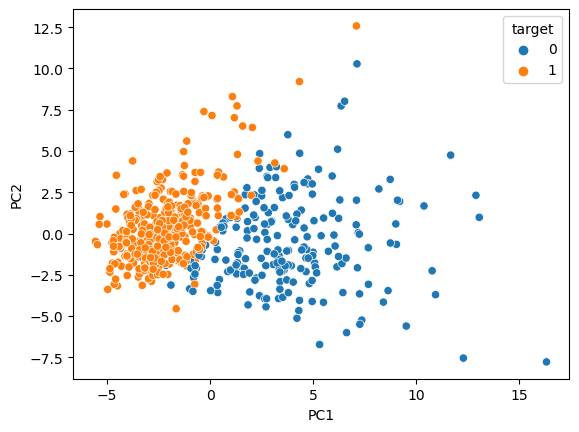

Accuracy Score Train data is:-  0.9208791208791208
Accuracy Score Test data is:-  0.9035087719298246


In [60]:
df=load_breast_cancer()
x=pd.DataFrame(df.data,columns=df.feature_names)
y=df.target
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
pca=PCA(n_components=2) #reduce dim to 2
projected=pca.fit_transform(x_scaled)
pc1=projected[:,0]
pc2=projected[:,1]
df=pd.DataFrame(pc1,columns=['PC1'])
df['PC2']=pc2
df['target']=y
print(df.head())
sns.scatterplot(data=df,x='PC1',y='PC2',hue='target')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
df=df.drop('target',axis=1)
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=1)
model=GaussianNB()
model.fit(X_train,y_train)
print('Accuracy Score Train data is:- ',model.score(X_train,y_train))
print('Accuracy Score Test data is:- ',model.score(X_test,y_test))

In [61]:
inputs=np.array([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,471,0.2419,0.07871,1.095,0.9053,8.589,153.4,6399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,656,0.7119,0.2654,0.4601,0.1189]])
scale=sc.transform(inputs)
pca_input=pca.transform(scale)
model.predict(pca_input)

array([0])